Universidade Estadual de Campinas – UNICAMP 

Disciplina: Ciência e Visualização de Dados em Saúde

                    Análise de dados da hanseníase: uma abordagem preditiva para a saúde pública

# Imports e configs de módulos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.005)

# Datasets

In [6]:
df_hans = pd.read_csv('../data/raw/hans_all_raw.csv')

/tmp/ipykernel_551833/2381453392.py:1: DtypeWarning: Columns (10,15,21,22,23,24,26,27,33,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hans = pd.read_csv('../data/raw/hans_all_raw.csv')


In [7]:
df_hans.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,SEM_DIAG,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,NDUPLIC_N,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,MIGRADO_W,ID_OCUPA_N,NU_LESOES,FORMACLINI,AVALIA_N,CLASSOPERA,MODOENTR,MODODETECT,BACILOSCOP,DTINICTRAT,ESQ_INI_N,CONTREG,NERVOSAFET,UFATUAL,ID_MUNI_AT,DT_NOTI_AT,ID_UNID_AT,UFRESAT,MUNIRESAT,DTULTCOMP,CLASSATUAL,AVAL_ATU_N,ESQ_ATU_N,DOSE_RECEB,EPIS_RACIO,DTMUDESQ,CONTEXAM,DTALTA_N,TPALTA_N,IN_VINCULA,NU_LOTE_IA
0,2,A309,10/01/2001,2001,41.0,410304,1359.0,2741474.0,10/12/2000,NaN,1942,4058,M,6.0,NaN,0.0,41.0,410304.0,1359.0,1.0,0.0,NaN,NaN,NaN,11/03/2008,NaN,NaN,22/05/2009,0.0,NaN,NaN,NaN,1.0,NaN,0.0,1.0,0.0,2.0,1.0,2.0,NaN,10/12/2000,3.0,0.0,NaN,PR,410304.0,10/01/2001,2741474.0,41.0,410304.0,02/10/2002,2.0,0.0,3.0,NaN,NaN,NaN,0.0,02/10/2002,1.0,0.0,0.0
1,2,A309,17/01/2001,2001,41.0,410940,1359.0,2741369.0,23/12/2000,NaN,1956,4044,M,6.0,1.0,0.0,41.0,410940.0,1359.0,1.0,0.0,NaN,NaN,NaN,28/12/2007,NaN,NaN,22/12/2010,0.0,NaN,NaN,NaN,1.0,NaN,0.0,4.0,2.0,2.0,6.0,NaN,NaN,17/01/2001,3.0,3.0,NaN,PR,410940.0,17/01/2001,2741369.0,41.0,410940.0,19/12/2001,2.0,0.0,3.0,NaN,NaN,NaN,2.0,19/12/2001,1.0,0.0,0.0
2,2,A309,16/01/2001,2001,41.0,410940,1359.0,2741369.0,16/01/2001,NaN,1968,4032,M,6.0,1.0,3.0,41.0,410940.0,1359.0,1.0,0.0,NaN,NaN,NaN,28/12/2007,NaN,NaN,22/12/2010,0.0,NaN,NaN,NaN,1.0,NaN,0.0,2.0,0.0,1.0,1.0,1.0,NaN,16/01/2001,1.0,1.0,NaN,PR,410940.0,16/01/2001,2741369.0,41.0,410940.0,27/06/2001,1.0,0.0,1.0,NaN,NaN,NaN,1.0,27/06/2001,1.0,0.0,0.0
3,2,A309,08/01/2001,2001,41.0,411780,1359.0,2743116.0,08/01/2001,NaN,1960,4040,F,9.0,NaN,3.0,41.0,411780.0,1359.0,1.0,0.0,NaN,NaN,NaN,10/12/2007,NaN,NaN,22/12/2010,0.0,NaN,NaN,NaN,1.0,NaN,0.0,1.0,1.0,2.0,1.0,2.0,NaN,08/01/2001,3.0,3.0,NaN,PR,411780.0,08/01/2001,2743116.0,41.0,411780.0,28/01/2002,2.0,0.0,3.0,NaN,NaN,NaN,3.0,28/01/2002,1.0,0.0,0.0
4,2,A309,02/01/2001,2001,41.0,411780,1359.0,2743116.0,11/01/2000,NaN,1968,4031,M,6.0,NaN,0.0,41.0,411780.0,1359.0,1.0,0.0,NaN,NaN,NaN,10/12/2007,NaN,NaN,22/12/2010,0.0,NaN,NaN,NaN,1.0,NaN,0.0,4.0,1.0,2.0,3.0,NaN,NaN,02/01/2001,3.0,0.0,NaN,PR,411780.0,02/01/2001,2743116.0,41.0,411780.0,14/03/2002,2.0,2.0,3.0,NaN,NaN,NaN,0.0,14/03/2002,1.0,0.0,0.0


In [9]:
df_hans.shape

(923411, 63)

### Filtros

In [10]:
# Filtra apenas os dados que não estão duplicados
df_hans = df_hans[df_hans['NDUPLIC_N'] != 2]
df_hans.drop(['NDUPLIC_N'], axis=1, inplace=True)
df_hans.shape

(923289, 62)

In [11]:
# Filtra apenas os casos que estão no Brasil
df_hans = df_hans[df_hans['ID_PAIS'] == 1]
df_hans.drop(['ID_PAIS'], axis=1, inplace=True)
df_hans.shape

(923105, 61)

In [12]:
# Filtra apenas os novos casos registrados no sistema (exclui reincidente)
df_hans = df_hans[df_hans['MODOENTR'] == 1]
df_hans.drop(['MODOENTR'], axis=1, inplace=True)
df_hans.shape

(782539, 60)

In [13]:
# Filtra apenas casos com desfecho: cura, óbito ou abandono
df_hans = df_hans[df_hans['TPALTA_N'].isin([1, 6, 7])]
df_hans.shape

(682468, 60)

### Pandas Profiling

In [14]:
profile = ProfileReport(df_hans, title='Report', correlations={
                                                "pearson": {"calculate": False},
                                                "spearman": {"calculate": False},
                                                "kendall": {"calculate": False},
                                                "phi_k": {"calculate": False},
                                                "cramers": {"calculate": False}},
                                             missing_diagrams={
                                                "heatmap": False,
                                                "dendrogram": False,
                                                "matrix": False,
                                                "bar": False},
                                             interactions={
                                                "continuous": False})

In [15]:
profile.to_file("../assets/reports/report.html")

Summarize dataset:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 61/67 [00:45<00:02,  2.21it/s, Calculate auto correlation]/home/stelzer-monar/.local/lib/python3.10/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
/home/stelzer-monar/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/stelzer-monar/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not

### Mudança tipo de colunas

In [16]:
cols_to_change = [elem for elem in df_hans.columns if 'ID_' in elem or 'CS_' in elem or 'UF' in elem or 'MUNI' in elem]
others_cols = ['FORMACLINI', 'AVALIA_N', 'CLASSOPERA', 'MODODETECT', 'BACILOSCOP', 'ESQ_INI_N', 'CLASSATUAL', 
                'AVAL_ATU_N', 'ESQ_ATU_N', 'EPIS_RACIO', 'TPALTA_N']
cols_to_change = cols_to_change + others_cols
df_hans[cols_to_change] = df_hans[cols_to_change].astype(str)

In [17]:
df_hans.shape

(682468, 60)

### Exclusão de low variance features

In [18]:
target = ['DTALTA_N', 'TPALTA_N']
feats = df_hans.drop(target, axis=1).columns
num_feats = [feat for feat in feats if df_hans[feat].dtype != 'O']
cat_feats = [feat for feat in feats if feat not in num_feats]

In [19]:
def drop_low_variance_cat(df, col):
    if df[col].nunique() == 1:
        return True
    elif df[col].value_counts(1).iloc[0] > 0.9:
        return True
    elif df[col].value_counts().iloc[0] < df[col].isna().sum():
        return True
    else:
        return False
    
def drop_low_variance_num(df, col):
    if df[col].nunique() == 1:
        return True
    elif df[col].isna().sum()/len(df) > 0.5:
        return True
    else:
        return False

low_var_feats = [col for col in cat_feats if drop_low_variance_cat(df_hans, col)]
cat_feats = [feat for feat in cat_feats if feat not in low_var_feats]

low_var_feats = [col for col in num_feats if drop_low_variance_num(df_hans, col)]
num_feats = [feat for feat in num_feats if feat not in low_var_feats]

In [20]:
def is_high_card(df, col):
    if df[col].nunique()/len(df) > 0.3:
        return True
    else:
        return False
    
high_card_feats = [col for col in cat_feats if is_high_card(df_hans, col)]
print(high_card_feats)
cat_feats = [col for col in cat_feats if col not in high_card_feats]

[]


In [21]:
df_hans_filtered = df_hans[cat_feats + num_feats + target].copy()
df_hans_filtered.shape

(682468, 42)

### Remoção colunas

In [22]:
df_hans_filtered.drop(['DT_NOTIFIC', 'NU_IDADE_N', 'NU_LOTE_IA', 'NU_LOTE_IA', 'NU_LOTE_V'], axis=1, inplace=True)
df_hans_filtered.shape

(682468, 38)

### Remoção de duplicatas

In [23]:
df_hans_processed = df_hans_filtered.drop_duplicates()
df_hans_processed.shape

(682444, 38)

### Análise de casos por ano

In [24]:
df_hans_processed['NU_ANO'].value_counts().sort_index()

2001    41504
2002    45095
2003    47704
2004    46326
2005    45713
2006    41933
2007    37916
2008    38010
2009    35661
2010    32232
2011    31390
2012    30233
2013    28945
2014    28713
2015    26069
2016    22599
2017    23516
2018    25395
2019    24802
2020    15188
2021    12026
2022     1474
Name: NU_ANO, dtype: int64

In [32]:
df_hans_processed["ANO_REF"] = pd.to_datetime(df_hans_processed["DTINICTRAT"], format="%d/%m/%Y").dt.year 

/tmp/ipykernel_551833/260871728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hans_processed["ANO_REF"] = pd.to_datetime(df_hans_processed["DTINICTRAT"], format="%d/%m/%Y").dt.year


<Axes: >

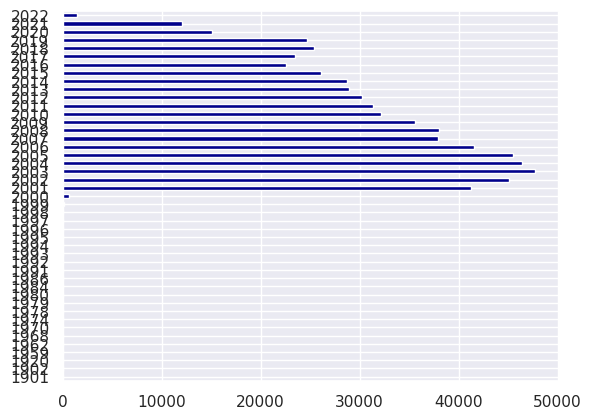

In [33]:
df_hans_processed['ANO_REF'].value_counts().sort_index().plot.barh(color='darkblue')

### Corte temporal

In [34]:
df_hans_pre_covid = df_hans_processed[(df_hans_processed['ANO_REF'] >=2009) & (df_hans_processed['ANO_REF'] <=2019)].copy()
df_hans_pre_covid.shape

(309292, 39)

In [35]:
df_hans_pos_covid = df_hans_processed[(df_hans_processed['ANO_REF'] > 2019)].copy()

### Salva bases tratadas

In [36]:
df_hans_processed.to_csv('../data/interim/hans_interim.csv', index=False)

In [37]:
df_hans_pre_covid.to_csv('../data/interim/hans_pre_covid.csv', index=False)

In [38]:
df_hans_pos_covid.to_csv('../data/interim/hans_pos_covid.csv', index=False)